For X1:
Model: Y = 5.9279 + -2.0383 * X1
Final loss: 0.9850



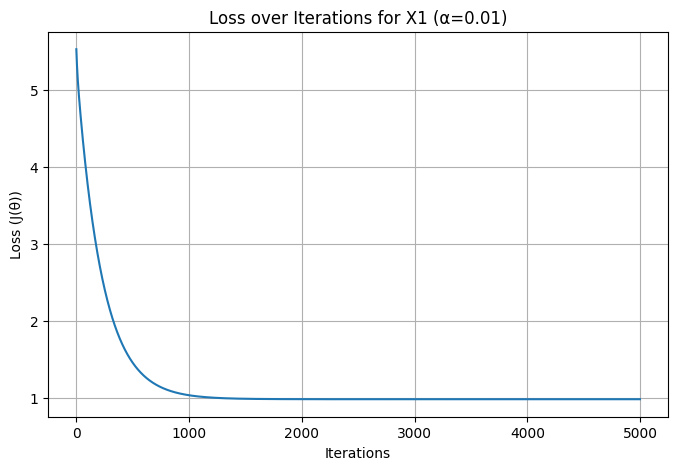

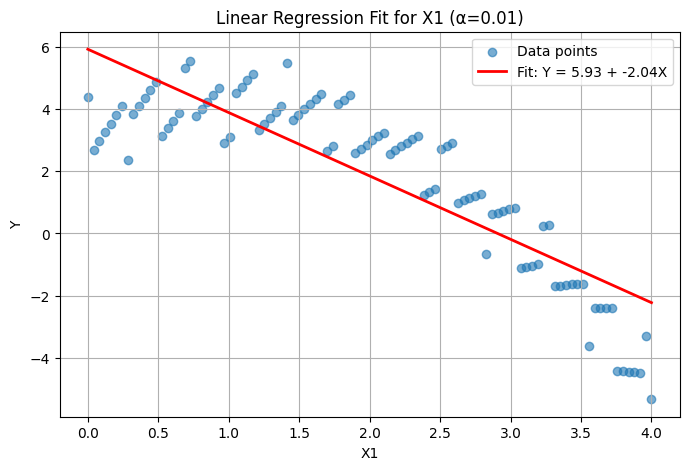

For X2:
Model: Y = 0.7361 + 0.5576 * X2
Final loss: 3.5994



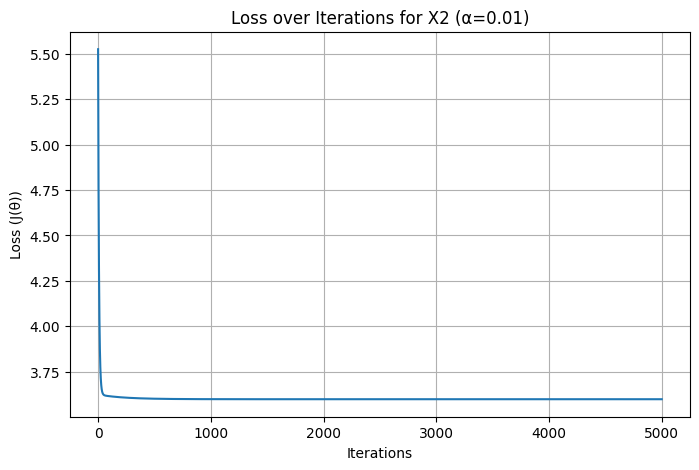

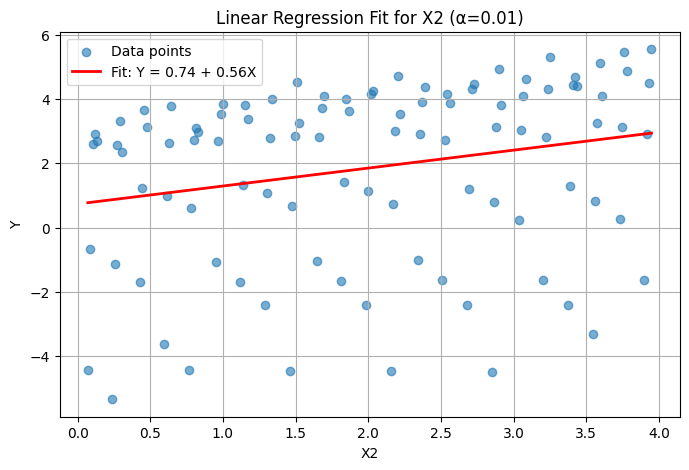

For X3:
Model: Y = 2.8714 + -0.5205 * X3
Final loss: 3.6295



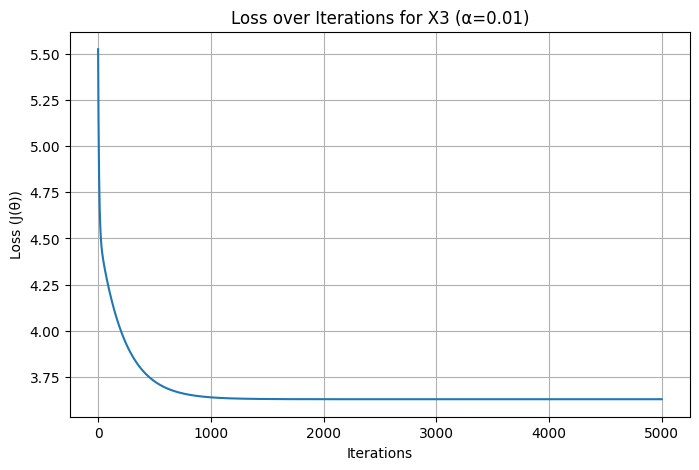

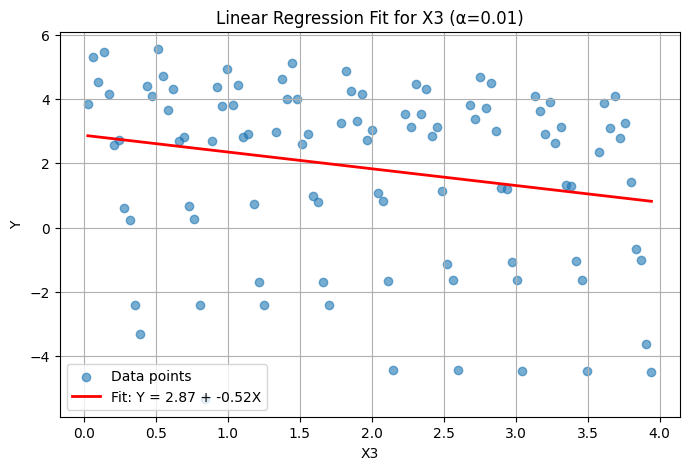

The explanatory variable with the lowest loss: X1 (loss = 0.9850)

--- Learning Rate Exploration (on X1) ---
LR=0.1: theta0=5.9279, theta1=-2.0383, Final loss=0.9850
LR=0.05: theta0=5.9279, theta1=-2.0383, Final loss=0.9850
LR=0.01: theta0=5.9279, theta1=-2.0383, Final loss=0.9850


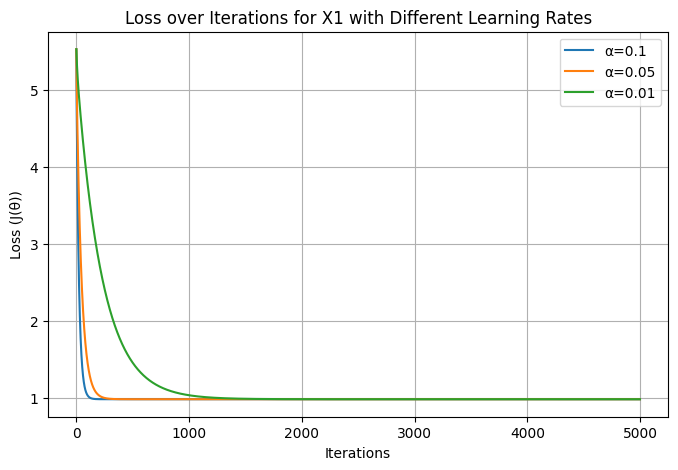

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

######Load data from uploaded CSV file
df = pd.read_csv('/content/D3.csv')  # Path to the uploaded file in Colab
X1 = df['X1'].values
X2 = df['X2'].values
X3 = df['X3'].values
Y = df['Y'].values

#####Gradient Descent function
def gradient_descent(X, y, alpha, num_iters):
    """
    Performs GD for simple linear regression: y = theta0 + theta1 * X
    Returns: theta (array [theta0, theta1]), losses (array of J over iterations)
    """
    m = len(y)
    theta = np.zeros(2)  # Initialize theta0 and theta1 to 0
    losses = np.zeros(num_iters)

    for i in range(num_iters):
        # Predictions
        h = theta[0] + theta[1] * X
        # Cost
        loss = (1 / (2 * m)) * np.sum((h - y)**2)
        losses[i] = loss
        # Gradients
        grad = np.zeros(2)
        grad[0] = (1 / m) * np.sum(h - y)  # For theta0
        grad[1] = (1 / m) * np.sum((h - y) * X)  # For theta1
        # Update
        theta -= alpha * grad

    return theta, losses

######Main training for each explanatory variable (alpha=0.01, increased iters for convergence)
alpha = 0.01
num_iters = 5000  # Increased for full convergence
Xs = [X1, X2, X3]
names = ['X1', 'X2', 'X3']
models = {}
final_losses = {}
min_loss_var = None
min_loss = float('inf')

for i, (X, name) in enumerate(zip(Xs, names)):
    theta, losses = gradient_descent(X, Y, alpha, num_iters)
    models[name] = theta
    final_loss = losses[-1]
    final_losses[name] = final_loss

    print(f"For {name}:")
    print(f"Model: Y = {theta[0]:.4f} + {theta[1]:.4f} * {name}")
    print(f"Final loss: {final_loss:.4f}\n")

    if final_loss < min_loss:
        min_loss = final_loss
        min_loss_var = name

    #Plot 1: Loss over iterations
    plt.figure(figsize=(8, 5))
    plt.plot(losses)
    plt.title(f'Loss over Iterations for {name} (α={alpha})')
    plt.xlabel('Iterations')
    plt.ylabel('Loss (J(θ))')
    plt.grid(True)
    plt.savefig(f'loss_{name}.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()  # Close to avoid display clutter

    ##Plot 2: Regression model (scatter + fit line)
    sort_idx = np.argsort(X)
    plt.figure(figsize=(8, 5))
    plt.scatter(X[sort_idx], Y[sort_idx], alpha=0.6, label='Data points')
    x_line = np.linspace(min(X), max(X), 100)
    y_line = theta[0] + theta[1] * x_line
    plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Fit: Y = {theta[0]:.2f} + {theta[1]:.2f}X')
    plt.title(f'Linear Regression Fit for {name} (α={alpha})')
    plt.xlabel(name)
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'regression_{name}.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()

###############Report best variable
print(f"The explanatory variable with the lowest loss: {min_loss_var} (loss = {min_loss:.4f})")

####Explore different learning rates (on X1 for illustration)
print("\n--- Learning Rate Exploration (on X1) ---")
lrs = [0.1, 0.05, 0.01]
lr_results = {}

fig, ax = plt.subplots(figsize=(8, 5))
for lr in lrs:
    theta, losses = gradient_descent(X1, Y, lr, num_iters)
    final_loss = losses[-1]
    lr_results[lr] = {'theta': theta, 'final_loss': final_loss}

    print(f"LR={lr}: theta0={theta[0]:.4f}, theta1={theta[1]:.4f}, Final loss={final_loss:.4f}")

    #Plot loss curve for this LR
    ax.plot(losses, label=f'α={lr}')

ax.set_title('Loss over Iterations for X1 with Different Learning Rates')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss (J(θ))')
ax.legend()
ax.grid(True)
plt.savefig('loss_lr_comparison_X1.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

###Download plots
from google.colab import files
for name in names:
    files.download(f'loss_{name}.png')
    files.download(f'regression_{name}.png')
files.download('loss_lr_comparison_X1.png')